# 1. Introduction to Sampling
Copyright to Datacamp

## 1.1 Sampling and Point Estimates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(19790801)

In [2]:
spotify_data= '/Users/geraldo/Documents/Code/AIML/Portofolio/1. Sampling in Python/dataset/spotify_2000_2020.feather'
coffee_data= '1. Sampling in Python/dataset/coffee_ratings_full.feather'
attrition_data= '/Users/geraldo/Documents/Code/AIML/Portofolio/1. Sampling in Python/dataset/attrition.feather'

spotify_population= pd.read_feather(spotify_data)
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [3]:
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
40648,0.98400,['Agnes Obel'],0.648,230547.0,3.842450,0.189,0.0,7kaub3iYrvVz5gaPVemsWE,0.000375,9.0,0.1320,-13.553,0.0,Riverside,48.0,2010,0.0311,98.891,0.231,2010.0
8708,0.04410,['Black Eyed Peas'],0.955,312160.0,5.202667,0.483,0.0,0KJ0CwNDO83xxvm4Sepcs2,0.000029,6.0,0.5470,-6.170,0.0,The Boogie That Be,43.0,2003,0.0982,105.091,0.446,2003.0
17603,0.45900,['Leona Lewis'],0.492,242093.0,4.034883,0.641,0.0,2DWO9x9rhszjJsabuPqp8P,0.000000,0.0,0.0809,-5.296,1.0,Happy,51.0,2009-11-16,0.0448,76.070,0.235,2009.0
5532,0.00545,['Bring Me The Horizon'],0.339,301941.0,5.032350,0.839,0.0,35xAZwCzE58O6EXbzgTSxc,0.000081,1.0,0.0739,-4.410,1.0,And The Snakes Start To Sing,51.0,2013-04-02,0.0488,82.530,0.145,2013.0
17985,0.05160,['Marietta'],0.276,271339.0,4.522317,0.637,1.0,6Xaj8GsQdL80McMIBW9IzJ,0.015300,0.0,0.6830,-8.904,1.0,Cinco De Mayo Shit Show,47.0,2013-11-08,0.0319,137.861,0.403,2013.0


In [4]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8108489333333337


Simple Sampling and Calculating with Numpy

In [5]:
loudness_pop= spotify_population['loudness']
loudness_samp= loudness_pop.sample(n= 100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

In [6]:
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.507420000000001


## 1.2 Convenience Sampling

**Are findings from the sample generalizable?**

Convenience sampling, is a collecting data using the easiest method, which may result in sampling that are not representative of the population.

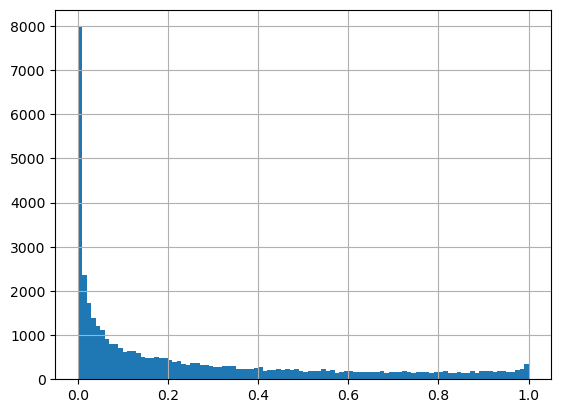

In [7]:
# Checking the distribution of population
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

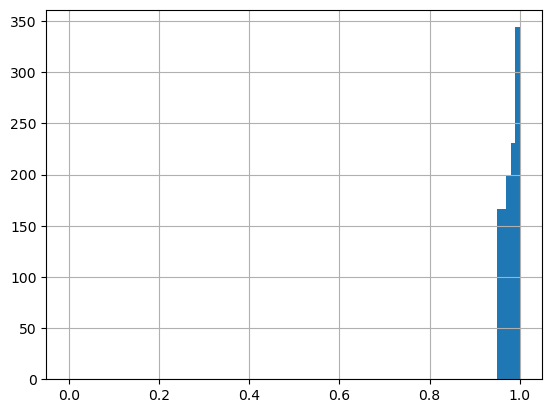

In [8]:
# Using this mysterious sample
spotify_population[spotify_population['acousticness'] > 0.95]['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

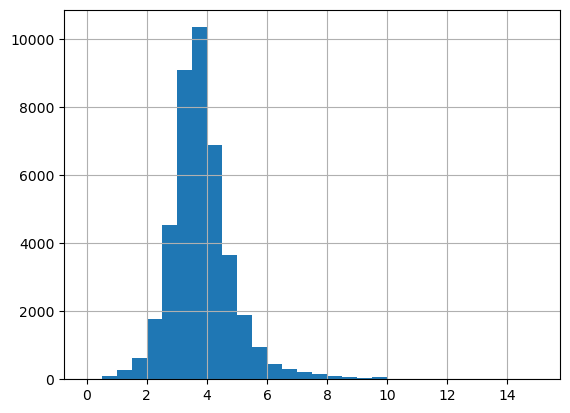

In [9]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins= np.arange(0, 15.5, 0.5))
plt.show()

## 1.3 Pseudo-random number generation

**Definition**: {adj} made, done, happening, or chosen without method or conscious decision.

**True Random Numbers**:
1. Generated from physical processes, like flipping coins
2. Hotbits uses radioactive decay
3. Random.org uses atmospheric noise (radio signal generated by lightning)

True randomness are expensive!

---
1. Pseudo-random number generatio is *cheap* and *fast*
2. Next 'random' number is calculated from previous 'random' number
3. The first random number are calculated from a **seed**
4. The same **seed** value yields the same random numbers

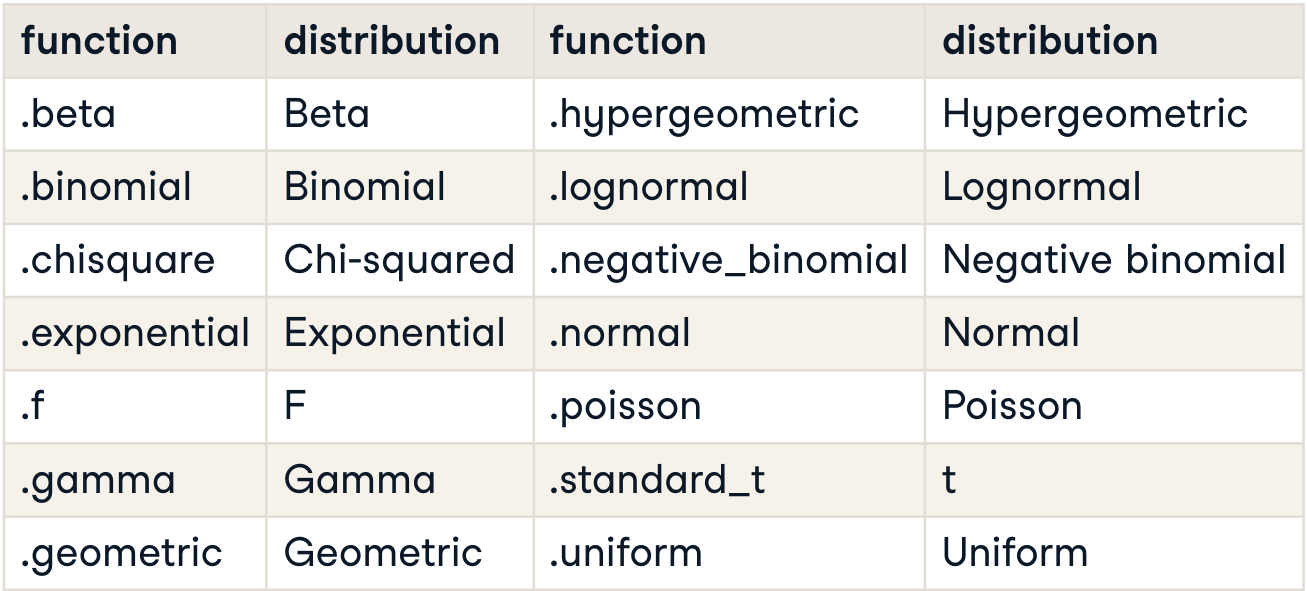

Generating Random Number

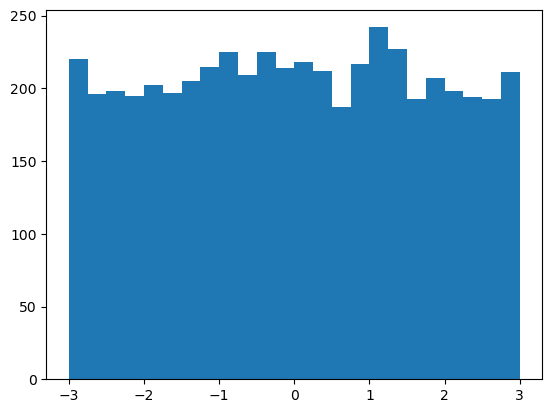

In [10]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)
plt.hist(uniforms, bins= np.arange(-3, 3.25, 0.25))
plt.show()

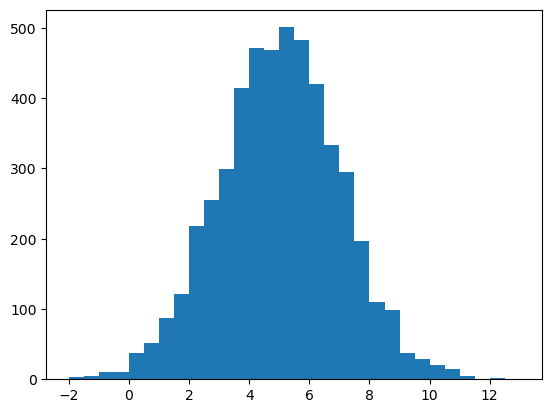

In [11]:
normals= np.random.normal(loc= 5, scale= 2, size= 5000)
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, np.arange(-2, 13.5, 0.5))
plt.show()

# 2. Sampling Methods

## 2.1 Simple random and systematic sampling

In [12]:
attrition_pop= pd.read_feather(attrition_data)
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


Regular Sampling

In [13]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n= 70, random_state= 18900217)

# Print the sample
attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


**Systematic Sampling**

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

In [14]:
sample_size= 70

# Calculate the population size from attrition_pop
pop_size= len(attrition_pop)

# Calculate the interval
interval= pop_size // sample_size

In [15]:
# Systematically sample 70 rows
attrition_sys_samp= attrition_pop[::interval]

attrition_sys_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


**Is systematic sampling okay?**

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

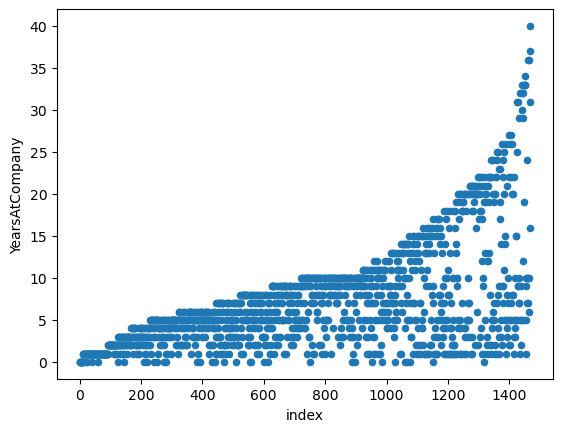

In [16]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x= 'index', y= 'YearsAtCompany', kind= 'scatter')
plt.show()

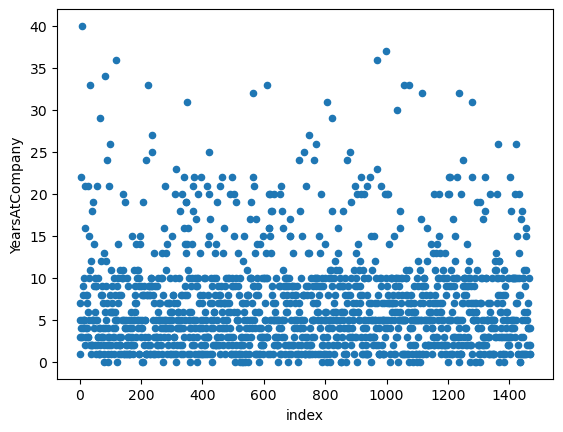

In [17]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac= 1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop= True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x= 'index', y= 'YearsAtCompany', kind= 'scatter')
plt.show()

## 2.2 Stratified and weighted random sampling

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [18]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize= True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [19]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education', observed= False).sample(frac= 0.4, random_state= 2022)

# Print the sample
attrition_strat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [20]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize= True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [21]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n= 30, random_state= 2022)

# Print the sample
attrition_eq.head()

/var/folders/jc/46_slfdn1kqdqvhq8h39xbk80000gn/T/ipykernel_49883/2315242501.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_eq = attrition_pop.groupby('Education').sample(n= 30, random_state= 2022)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [22]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize= True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


Weighted Sampling

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

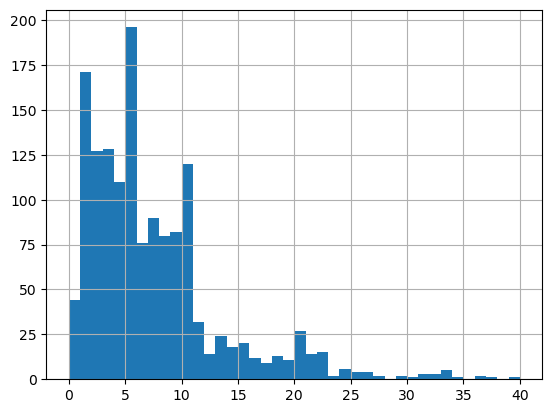

In [23]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins= np.arange(0, 41, 1))
plt.show()

In [24]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n= 400, weights= 'YearsAtCompany')

# Print the sample
attrition_weight

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1423,49,0.0,Travel_Rarely,465,Research_Development,6,Below_College,Life_Sciences,High,Female,...,Excellent,Medium,1,30,3,Better,15,11,2,12
1088,45,0.0,Non-Travel,1050,Sales,9,Master,Life_Sciences,Medium,Female,...,Excellent,Very_High,1,15,2,Better,15,10,4,12
609,29,0.0,Travel_Rarely,469,Sales,10,Bachelor,Medical,High,Male,...,Excellent,High,0,8,2,Better,5,2,1,4
454,27,0.0,Travel_Frequently,1242,Sales,20,Bachelor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,7,2,Better,7,7,0,7
737,36,0.0,Travel_Frequently,1467,Sales,11,College,Technical_Degree,Medium,Female,...,Excellent,High,1,10,6,Better,9,7,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,38,0.0,Travel_Rarely,371,Research_Development,2,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,6,3,Better,3,2,1,2
1133,36,1.0,Travel_Rarely,530,Sales,3,Below_College,Life_Sciences,High,Male,...,Excellent,Low,1,16,6,Better,16,7,3,7
1333,55,0.0,Travel_Rarely,282,Research_Development,2,College,Medical,Very_High,Female,...,Excellent,Very_High,1,23,5,Better,19,9,9,11
411,24,0.0,Travel_Frequently,567,Research_Development,2,Below_College,Technical_Degree,Low,Female,...,Excellent,High,0,6,2,Better,6,3,1,3


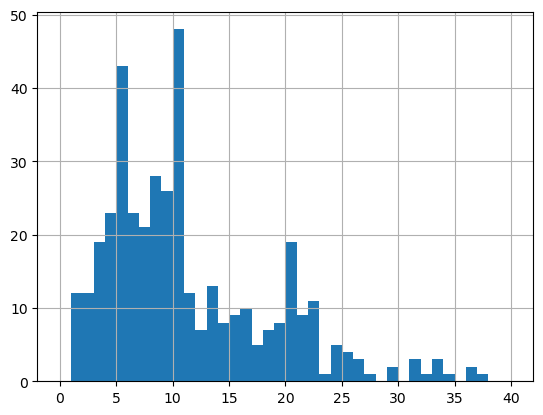

In [25]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_weight['YearsAtCompany'].hist(bins= np.arange(0, 41, 1))
plt.show()

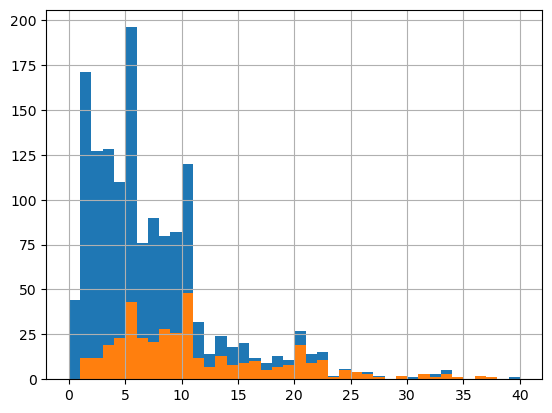

In [26]:
# Putting the 2 plot together

attrition_pop['YearsAtCompany'].hist(bins= np.arange(0, 41, 1))
attrition_weight['YearsAtCompany'].hist(bins= np.arange(0, 41, 1))
plt.show()

## 2.3 Cluster Sampling

The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

In [27]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

In [28]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

In [29]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole', observed= False).sample(n= 10, random_state= 2022)

/var/folders/jc/46_slfdn1kqdqvhq8h39xbk80000gn/T/ipykernel_49883/4071070445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


In [30]:
attrition_clust.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2


**3 Kinds of Sampling**

In [31]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac= 1/4, random_state= 2022)

In [32]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac= 1/4, random_state= 2022)


/var/folders/jc/46_slfdn1kqdqvhq8h39xbk80000gn/T/ipykernel_49883/3214214693.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac= 1/4, random_state= 2022)


In [33]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k= 2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n= len(attrition_pop) // 8, random_state= 2022)


/var/folders/jc/46_slfdn1kqdqvhq8h39xbk80000gn/T/ipykernel_49883/1930009796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
/var/folders/jc/46_slfdn1kqdqvhq8h39xbk80000gn/T/ipykernel_49883/1930009796.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n= len(attrition_pop) // 8, random_state= 2022)


# 3. Sampling Distribution

## 3.1 Relative error of point estimates

**Calculating relative errors**

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [37]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n= 50, random_state= 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()   

# Calculate the relative error percentage
rel_error_pct50 = abs(attrition_pop['Attrition'].mean() - mean_attrition_srs50) / attrition_pop['Attrition'].mean() * 100

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658228


In [39]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n= 100, random_state= 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = abs(attrition_pop['Attrition'].mean() - mean_attrition_srs100) / attrition_pop['Attrition'].mean() * 100

# Print rel_error_pct50
print(rel_error_pct100)

6.962025316455694


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

## 3.2 Creating a sampling distribution

In [40]:
# Create an empty list
mean_attritions= []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.15, 0.16666666666666666, 0.16666666666666666, 0.15, 0.11666666666666667]


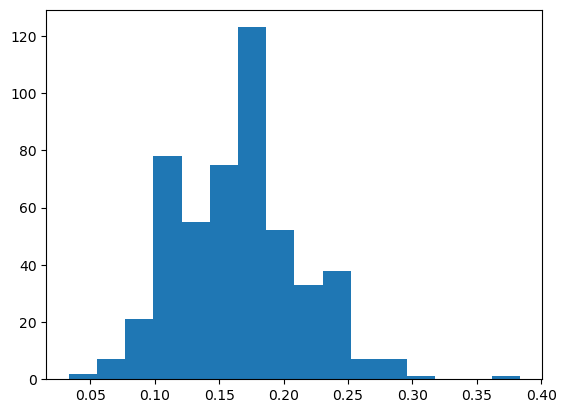

In [41]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins= 16)
plt.show()

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

## 3.3 Approximate Sampling Distributions

In [45]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [46]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

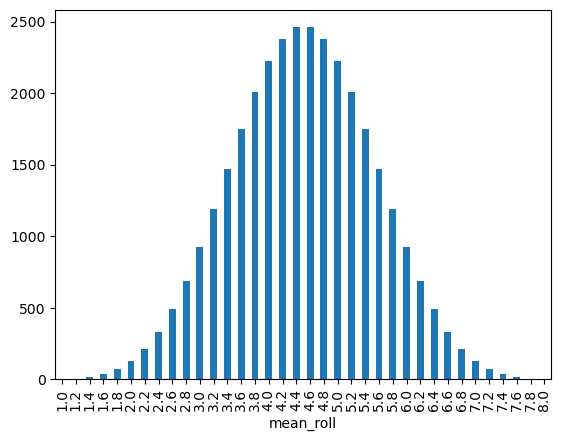

In [47]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort= False).plot(kind= 'bar')
plt.show()

## 3.4 Exact Sampling Distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is `8**5`, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In [48]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size= 5, replace= True)

# Print the mean of five_rolls
print(five_rolls.mean())

5.4


In [49]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[4.4, 4.8, 4.0, 5.8, 5.2, 5.8, 4.8, 4.2, 4.8, 4.4]


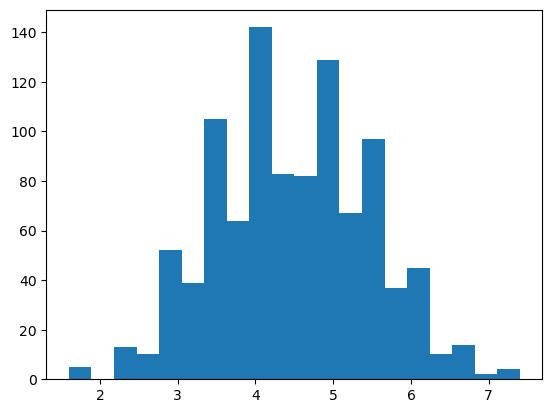

In [50]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins= 20)
plt.show()

## 3.5 Standard Errors and the Central Limit Theorem

In [54]:
sampling_distribution_5= attrition_pop.sample(n= 5)['Attrition']
sampling_distribution_50= attrition_pop.sample(n= 50)['Attrition']
sampling_distribution_500= attrition_pop.sample(n= 500)['Attrition']


# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.4
0.2
0.168


Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.



In [55]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof= 1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof= 1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof= 1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.5477225575051661
0.40406101782088427
0.3742407142795253


The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

# 4. Bootstrap Distribution

## 4.1 Introduction to Bootstrapping

Bootstrapping is the opposite of sampling from a population.

- Sampling treats the dataset as the population, and we generate a random subset.

- Bootstrapping treats the dataset as a sample, and uses it to build up a theoretical population.

### 4.1.1 Principles of bootstrapping

A little bit of **TRUE** and **FALSE**:

**TRUE**:
1. Bootstrap resamples should be the same size as the original sample
2. A bootstrap distribution consists of many replicates of the statistic of interest.
3. Each row in the dataset should have an equally likely chance of being drawn in a resample.

**FALSE**:
1. A bootstrap distribution is the same thing as a sampling distribution
2. Resampling means sampling without replacement
3. The statistic of interest for each bootstrap sample is always the mean

### 4.1.2 With or without replacement

**With Replacement**:
1. While studying variablity in tigers' weights, you colleceted data on 10 tigers. You suspect that there are around 50 in your region of Siberia.

2. A small hedge fund lacks the resources to track every stock, but feels confident that the 100 stocks they have tracked represent the markets.

**Without replacement**
1. A social media company released all their members' posts from the last year. You need to report on this data to your manager by the end of the week.

2. A regional census was conducted to understand the mean income of people living there. Analyzing the full dataset will take too much time.

## 4.2 Generating a Bootstrap Distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

In [ ]:
# Generate a subset first to math from the datacamp
spotify_sample = spotify_population[['artists', 'name', 'danceability']].reset_index()
spotify_sample = spotify_sample.rename(columns={'index': 'index'})
spotify_sample = spotify_sample.sample(frac=1)

# Display the shuffled DataFrame with original indices
spotify_sample.head()

,index,artists,name,danceability
25650,25650,['Panic! At The Disco'],"Nails for Breakfast, Tacks for Snacks",0.600
8525,8525,['Montez de Durango'],La Pava,0.706
3218,3218,['St. Vincent'],Cruel,0.570
34389,34389,['AC/DC'],Shoot to Thrill,0.453
4431,4431,['Rene & Angela'],I Love You More - Remastered,0.868


In [66]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac= 1, replace= True)

# Print the resample
print(spotify_1_resample)

       index                                  artists  \
40837  40837                          ['The Killers']   
15333  15333                   ['Monchy & Alexandra']   
5250    5250                         ['Chelsea Grin']   
26734  26734                            ['I Prevail']   
17714  17714          ['Diddy - Dirty Money', 'T.I.']   
...      ...                                      ...   
4309    4309                       ['Stephen Speaks']   
35367  35367  ['Moneybagg Yo', 'Megan Thee Stallion']   
19349  19349                    ['Alacranes Musical']   
40178  40178                ['Red Hot Chili Peppers']   
33688  33688                             ['R. Kelly']   

                                     name  danceability  
40837                    Miss Atomic Bomb         0.560  
15333                    No Es una Novela         0.891  
5250                             Recreant         0.514  
26734                               Scars         0.505  
17714                  He

In [67]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5927055574227003


In [68]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5902079292298829, 0.5918749471864797, 0.5910038889955829, 0.5892796667946995, 0.5915958685423468, 0.5931728946610332, 0.5919276742846169, 0.5905835893988862, 0.5906079532360283, 0.5908377448626849, 0.5918447546571923, 0.5917688952371807, 0.5908529983675822, 0.5907732835605914, 0.5903024582293067, 0.5920231683310928, 0.5907438136162858, 0.5909567289226041, 0.5920693033416554, 0.5910525422508163, 0.5916043115037449, 0.5914906664106011, 0.5912904647589783, 0.5922761426925294, 0.5902177693489534, 0.5896953236028423, 0.5897726161897446, 0.5908886666986749, 0.5926389115613597, 0.5921176637219129, 0.5905001848473209, 0.5906623343575955, 0.590024500672172, 0.5898751704436336, 0.590806534472825, 0.5918665402343, 0.5901967447666603, 0.5913834045515651, 0.5918008378144805, 0.5925899366237757, 0.5905312704052237, 0.5928512747263299, 0.5926978922604186, 0.5920866597849048, 0.5909202203764163, 0.5918320818129441, 0.5914521749567888, 0.5926880329364318, 0.5911707341079316, 0.591652532648358, 0.590

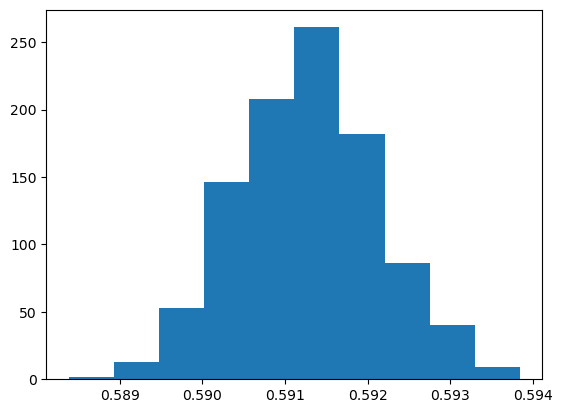

In [69]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## 4.3 Comparing sampling and population statistics

Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

**ANSWER**:
No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.

**REASON**:
Super standard error reasoning! If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.



In [73]:
# Sampling distribution vs Bootstrap distribution
spotify_population = spotify_population.reset_index()
spotify_population = spotify_population.rename(columns={'index': 'index'})
spotify_population.head()

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,...,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,...,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,...,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,...,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,...,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [74]:
spotify_sample= spotify_population.sample(n= 500)

In [75]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population.sample(n= 500)['popularity'])
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[54.146, 55.24, 55.144, 54.07, 54.408, 53.83, 54.644, 54.286, 54.478, 55.312, 54.052, 55.254, 54.232, 54.674, 55.282, 54.126, 54.766, 54.698, 55.196, 54.798, 54.732, 54.692, 54.538, 54.638, 54.766, 55.514, 54.524, 54.248, 54.556, 54.858, 54.738, 54.878, 53.542, 54.85, 54.708, 55.044, 54.552, 54.988, 56.12, 55.146, 54.13, 54.934, 54.756, 55.334, 55.484, 54.838, 54.412, 54.934, 54.516, 55.17, 54.424, 53.892, 54.726, 54.55, 54.498, 54.948, 54.7, 54.498, 54.81, 54.754, 55.232, 55.272, 55.178, 55.57, 54.186, 54.578, 54.93, 55.346, 55.336, 55.108, 54.21, 55.362, 54.974, 55.346, 55.004, 53.764, 54.702, 54.568, 54.91, 54.644, 55.12, 54.862, 54.638, 55.39, 55.002, 54.508, 54.7, 55.21, 54.724, 54.582, 54.132, 55.006, 55.312, 54.71, 53.604, 55.622, 55.012, 54.852, 54.474, 54.516, 55.27, 55.762, 54.866, 54.746, 54.854, 55.042, 55.1, 55.052, 55.56, 54.57, 54.476, 54.538, 54.684, 55.636, 55.434, 54.576, 54.748, 55.778, 54.28, 54.716, 54.668, 55.524, 54.636, 54.578, 54.626, 54.722, 54.906, 54.652, 55

In [76]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n= 500, replace= True)['popularity'])
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[55.25, 55.242, 55.306, 55.438, 55.574, 54.928, 55.688, 55.466, 55.462, 55.922, 55.608, 55.742, 55.15, 56.188, 54.952, 55.774, 54.932, 55.944, 56.126, 55.152, 54.736, 55.508, 55.326, 55.312, 54.934, 55.252, 56.08, 55.478, 55.376, 55.486, 55.676, 55.716, 55.334, 56.324, 55.916, 56.154, 56.17, 55.568, 55.646, 54.892, 55.206, 55.726, 56.748, 55.126, 55.396, 56.18, 55.482, 55.914, 55.11, 54.76, 55.316, 55.638, 55.566, 55.982, 55.62, 54.914, 54.748, 55.35, 55.576, 55.092, 55.426, 54.676, 55.218, 55.44, 55.714, 54.988, 54.694, 56.198, 55.854, 55.998, 54.744, 55.582, 55.154, 55.58, 55.852, 55.426, 56.08, 55.54, 55.422, 55.072, 55.216, 55.584, 55.51, 54.772, 55.698, 55.484, 55.432, 55.78, 55.916, 55.396, 55.79, 55.676, 56.174, 55.144, 54.084, 55.576, 55.528, 54.656, 55.616, 53.98, 55.586, 55.178, 55.414, 55.308, 54.942, 55.396, 54.16, 55.492, 55.552, 55.224, 55.298, 54.716, 55.924, 56.074, 55.356, 56.158, 55.402, 55.776, 55.534, 54.932, 56.518, 55.894, 55.922, 55.526, 56.038, 55.478, 55.218, 5

In [88]:
sampling_distribution = []

# Generate a sampling distribution of 5000 replicates
for i in range(5000):
    sampling_distribution.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population.sample(n= 5000)['popularity'])
    )

# Print the sampling distribution results
print(sampling_distribution)

[54.8216, 54.7474, 54.8738, 55.0134, 55.0238, 54.9744, 54.5454, 54.9448, 54.8312, 54.89, 54.7978, 54.7708, 54.8418, 55.2498, 54.9144, 54.7924, 54.7338, 54.8592, 54.9434, 54.5866, 54.9408, 55.0426, 54.9732, 54.969, 55.0006, 54.956, 54.8852, 54.732, 54.619, 54.686, 54.6322, 55.013, 54.868, 54.6802, 54.5422, 54.7924, 54.6316, 54.7388, 54.8664, 54.8228, 54.7038, 54.859, 54.7498, 54.8778, 55.0544, 54.8228, 54.8666, 54.8954, 54.8702, 54.9174, 54.8882, 54.8508, 55.0288, 54.9732, 54.8064, 54.6454, 55.1728, 54.762, 55.0062, 54.903, 54.8844, 54.7198, 54.9088, 55.05, 54.6814, 54.8754, 54.904, 54.7638, 54.8146, 54.9452, 54.8776, 54.7752, 54.5804, 54.6218, 54.8962, 54.8914, 54.9262, 54.7642, 54.582, 55.0188, 55.0726, 54.9892, 54.9492, 54.5892, 54.8504, 54.688, 54.8316, 54.6676, 54.6248, 54.8004, 54.6032, 54.7252, 54.7754, 55.0118, 54.9032, 54.7712, 54.9808, 54.8324, 54.8898, 54.8602, 54.823, 54.9518, 54.7968, 54.3426, 54.8132, 54.936, 54.8662, 54.8476, 54.8996, 54.832, 54.655, 54.992, 54.9704, 54.7

In [89]:
bootstrap_distribution = []

# Generate a bootstrap distribution of 5000 replicates
for i in range(5000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n= 5000, replace= True)['popularity'])
    )

# Print the bootstrap distribution results
print(bootstrap_distribution)

[55.4744, 55.4062, 55.8086, 55.3742, 55.8044, 55.4544, 55.4682, 55.443, 55.7806, 55.731, 55.6306, 55.6878, 55.7926, 55.3688, 55.4444, 55.4552, 55.576, 55.3958, 55.6256, 55.5074, 55.4642, 55.6898, 55.4706, 55.5018, 55.4864, 55.8262, 55.3512, 55.5464, 55.831, 55.3884, 55.533, 55.4668, 55.4408, 55.6764, 55.5604, 55.3008, 55.4722, 55.6026, 55.4464, 55.4248, 55.6862, 55.6672, 55.6226, 55.2834, 55.5868, 55.6278, 55.5, 55.2296, 55.5646, 55.3852, 55.3982, 55.6384, 55.7744, 55.5182, 55.4236, 55.2834, 55.3264, 55.387, 55.5212, 55.5326, 55.6366, 55.5926, 55.56, 55.6044, 55.5336, 55.4918, 55.5366, 55.2062, 55.531, 55.4934, 55.6238, 55.4306, 55.4014, 55.6348, 55.7154, 55.7004, 55.5858, 55.5254, 55.4394, 55.3446, 55.2548, 55.44, 55.5926, 55.404, 55.3902, 55.7004, 55.6388, 55.7286, 55.3172, 55.5272, 55.7762, 55.449, 55.5438, 55.5146, 55.6178, 55.6166, 55.3582, 55.5566, 55.5676, 55.7786, 55.1742, 55.5252, 55.5476, 55.2906, 55.4162, 55.2454, 55.4878, 55.6788, 55.5776, 55.1516, 55.6798, 55.444, 55.7334,

In [85]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 55.538, 54.836282000000004, 55.546568799999996]


The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.

In [90]:
# Checking the STD
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof= 0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof= 1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof= 1)*np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof= 1)*np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 11.034676441488294, 10.327264637200766, 11.057393436214186]


The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

## 4.4 Confidence Intervals


Confidence intervals can also be known as: 
> A range of plausible values for an unknown quantity.

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.



In [91]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(55.23439, 55.84601)


In [94]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof= 1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc= point_estimate, scale= standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc= point_estimate, scale= standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(55.23199656298823, 55.844975917011766)
